In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix





In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\tec/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [7]:
print(df)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [8]:
#Remove Rows
new_df = df.dropna()


In [23]:
new_df.shape

(7043, 22)

In [22]:
new_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,5375.00,3962.00,2564.00,5535.0,6511.0,6551.00,1002.0,4770.00,5604.0,4534.00,...,6875.0,437.00,5995.0,5504.00,1758.00,4853.0,1525.0,3367.0,5934.0,2226.00
gender,0.00,1.00,1.00,1.0,0.0,0.00,1.0,0.00,0.0,1.00,...,1.0,0.00,1.0,0.00,0.00,1.0,0.0,0.0,1.0,1.00
SeniorCitizen,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00
Partner,1.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.0,0.00,...,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.0,1.0,0.00
Dependents,0.00,0.00,0.00,0.0,0.0,0.00,1.0,0.00,0.0,1.00,...,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.0,0.0,0.00
tenure,1.00,34.00,2.00,45.0,2.0,8.00,22.0,10.00,28.0,62.00,...,38.0,67.00,19.0,12.00,72.00,24.0,72.0,11.0,4.0,66.00
PhoneService,0.00,1.00,1.00,0.0,1.0,1.00,1.0,0.00,1.0,1.00,...,1.0,1.00,1.0,0.00,1.00,1.0,1.0,0.0,1.0,1.00
MultipleLines,1.00,0.00,0.00,1.0,0.0,2.00,2.0,1.00,2.0,0.00,...,0.0,2.00,0.0,1.00,0.00,2.0,2.0,1.0,2.0,0.00
InternetService,0.00,0.00,0.00,0.0,1.0,1.00,1.0,0.00,1.0,0.00,...,1.0,1.00,1.0,0.00,2.00,0.0,1.0,0.0,1.0,1.00
OnlineSecurity,0.00,2.00,2.00,2.0,0.0,0.00,0.0,2.00,0.0,2.00,...,0.0,2.00,0.0,0.00,1.00,2.0,0.0,2.0,0.0,2.00


In [9]:
print(new_df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [10]:
print(new_df.tail())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

In [10]:
#prints the format of data in the dataset
print(new_df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
new_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print(new_df.to_string())

In [9]:
#Replace Empty Values

new_df.fillna(130, inplace = True)
print(new_df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [19]:
# Check for missing values
print(new_df.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# Convert TotalCharges to numeric (it is currently stored as an object)
new_df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [17]:
# Drop rows with missing values
new_df.dropna(inplace=True)


In [18]:
# Drop customerID as it is not useful for prediction
new_df.drop(columns=['customerID'], inplace=True)
print(new_df.to_string())


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [15]:
#Creating a "High-Risk Customers" Feature
new_df['HighRiskCustomers'] = ((new_df['PaymentMethod'] == 'Electronic check') & 
                           (new_df['MonthlyCharges'] > new_df['MonthlyCharges'].quantile(0.8))).astype(int)
print(new_df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0          

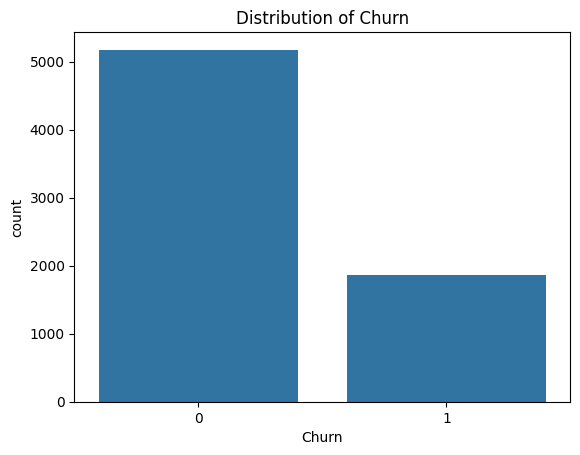

In [24]:
# Distribution of Churn
sns.countplot(x='Churn', data=new_df)
plt.title('Distribution of Churn')
plt.show()


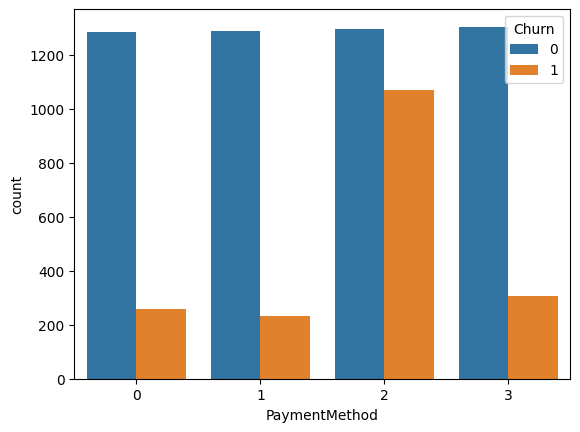

In [50]:
sns.countplot(x='PaymentMethod', hue='Churn', data=new_df)
plt.show()

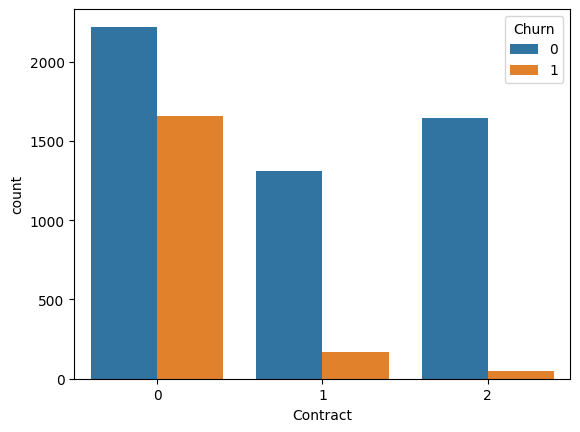

In [51]:
sns.countplot(x='Contract', hue='Churn', data=new_df)
plt.show()

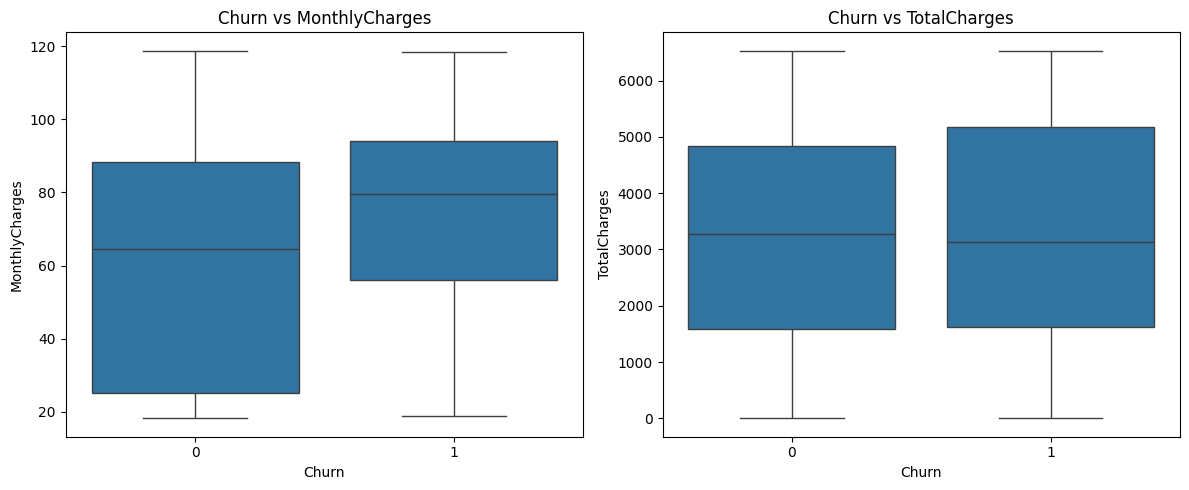

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.boxplot(x='Churn', y='MonthlyCharges', data=new_df, ax=axes[0])
axes[0].set_title("Churn vs MonthlyCharges")


sns.boxplot(x='Churn', y='TotalCharges', data=new_df, ax=axes[1])
axes[1].set_title("Churn vs TotalCharges")


plt.tight_layout()
plt.show()

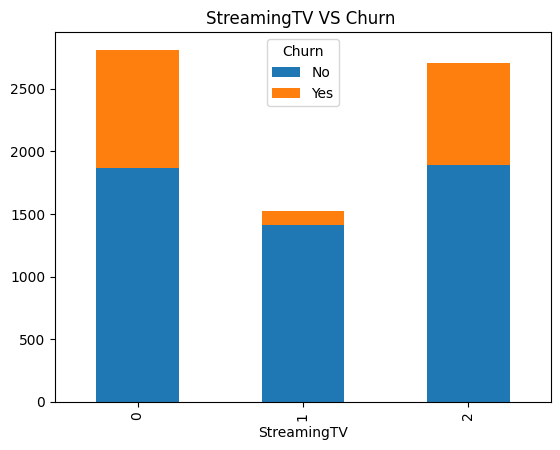

In [55]:
pd.crosstab(new_df['StreamingTV'], df['Churn']).plot(kind='bar', stacked=True)
plt.title("StreamingTV VS Churn ")
plt.show()

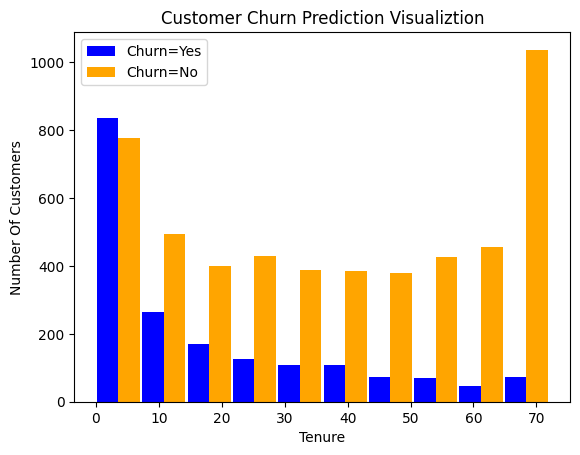

In [14]:
tenure_churn_no = new_df[new_df.Churn=='No'].tenure
tenure_churn_yes = new_df[new_df.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
#prints the unique values in each column
def print_unique_col_values(new_df):
       for column in new_df:
            if new_df[column].dtypes=='object':
                print(f'{column}: {new_df[column].unique()}') 

print_unique_col_values(new_df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [21]:
   for col in new_df:
    print(f'{col}: {new_df[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


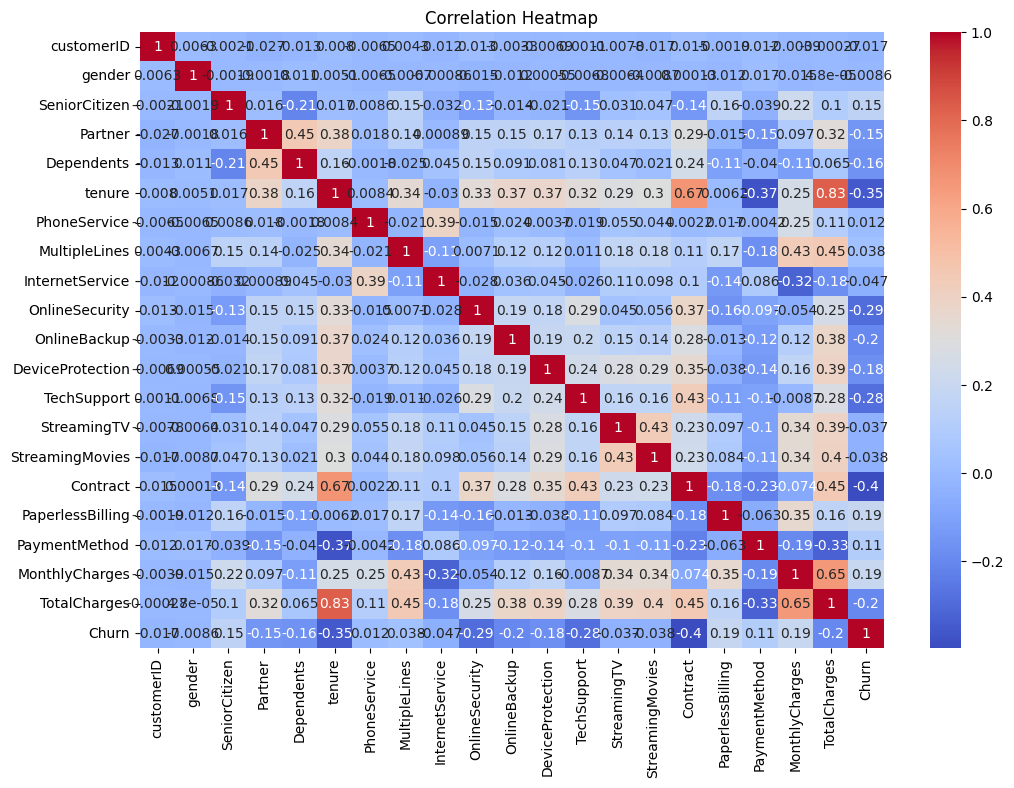

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [35]:
# Split the data into features and target
X = new_df.drop(columns=['Churn'])
y = new_df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [36]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7991483321504613
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [38]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7863733144073811
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



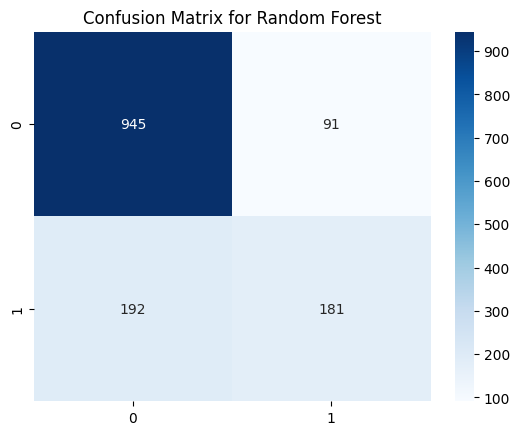

In [39]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()



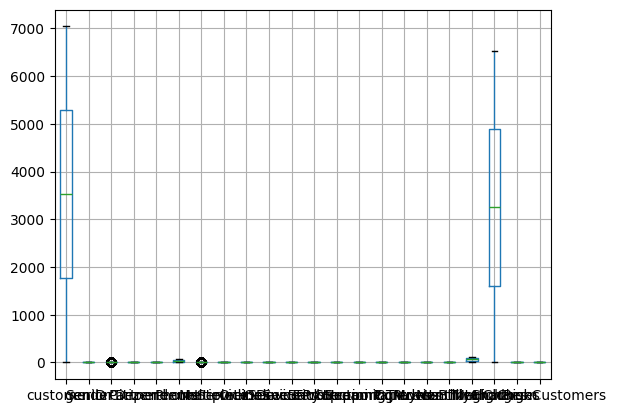

In [47]:
new_df.boxplot()
plt.show()

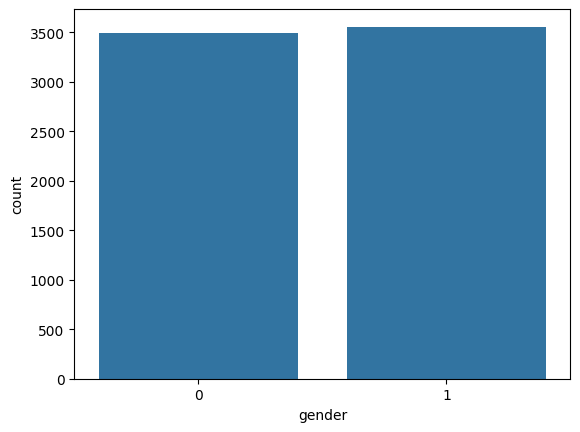

In [48]:
sns.countplot(x='gender', data=new_df)
plt.show()

In [25]:
import joblib
joblib.dump(rf_model, 'churn_prediction_model.pkl')


['churn_prediction_model.pkl']